# Piecewise Interpolation

## Introduction

In the previous notebook we introduced Lagrange interpolation as a method to approximate functions in terms of discrete known values of the function. Accordingly, if there were $N$ known values of the function it was possible to propose an $N-1$ order interpolating polynomial. Although this approach is theoretically fine, the specific interpolating polynomial would be problem dependent difficulting its automatization in a general computer code. In the finite element method this lack of generality is dealt with through the use of sub-domain based interpolation where the interpolation scheme is implemented for a general sub-domain of a fixed number of discrete points. Accordingly, in this technique the sample of $N$ data points is arranged in sub-domains, say of pairs of two points and the resulting interpolating polynomial is now piece-wise continous. In this notebook we cover the basics of this sub-domain or element based interpolation scheme. **After completing this notebook you should be able to:**

* Recognize the differences between a global and a local based interpolation scheme.

* Recognize the advantages and disadvantages between global and local interpolation scheme.

* Formulate, and implement in Python, locally based interpolation schemes.

* Recognize the fudamental concept of a finite element as a locally based interpolation scheme.

## Global scheme

Leat us consider the same function used for the interpolation problem described in the previous notebook and defined as:

 $$ f(x)=x^3+4x^2-10 $$

with $x$ in the interval $\left[ {{-1},{1}} \right]$. Assume also that we know the exact value of the function at points $[-1, -0.5, 0, 0.5, 1].$ These points will be called in what follows **nodes**. We will compute a unique Lagrange interpolating polynomial using the 5 knwon values of the function at the given nodes. The following block of code shows the steps required in this global scheme.

**(Add comments to clarify the relevant steps ion the code below)**

In [18]:
#Try using matplotlib inline instead of matplotlib notebook to see the difference
%matplotlib notebook        
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

In [19]:
def LagrangPoly(x,order,i,xi=None): 
    if xi==None:
        xi=sym.symbols('x:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

<IPython.core.display.Javascript object>


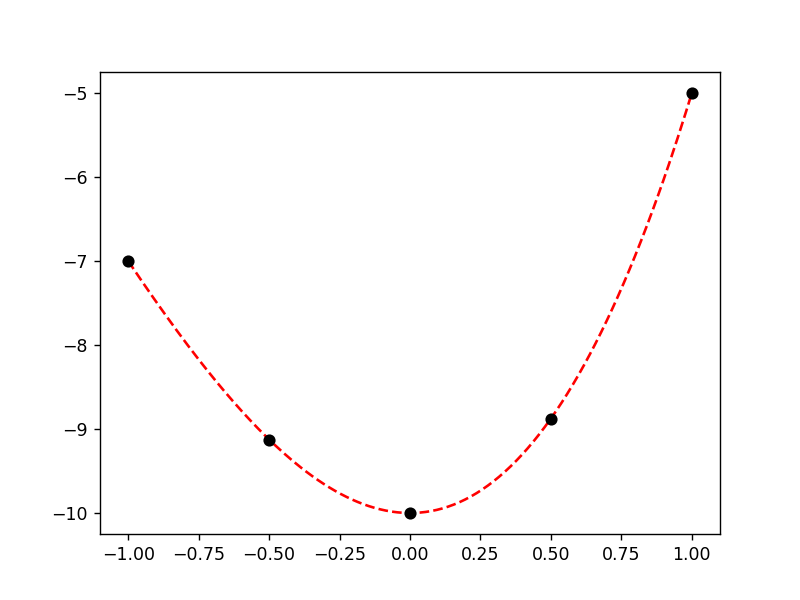

In [20]:
fx = lambda x: x**3+4.0*x**2-10.0
fdx = lambda x: 3*x**2+8.0*x 
#
npts = 200
xx = np.linspace(-1, 1, npts)  
x_data = np.array([-1, -0.5 , 0.0 , 0.5, 1])
fd = fx(x_data)

plt.figure(0)
yy = fx(xx) 
plt.plot(xx, yy ,'r--')
plt.plot([-1, -0.5 , 0.0 , 0.5, 1], fd, 'ko')

### Locally based Lagrange polynomials

We now split the problem domain corresponding to $x \in \left[ {{-1},{1}} \right]$ into 4-constant size subdomains. Each resulting sub-domain is comprised of two **nodes** which are used to define linear first-order polynomials.

In the following block of code we compute interpolation polynomials at each one of these $\triangle x=0.5$ sub-domians. Note that although each polynomial exists only at a given sub-domain all of them are exactly the same. This suggests that a more general and powerful implementation should compute only the linear polynomials once and then use them recursively in the construction of the approximating function.

**(Add comments to clarify the relevant steps ion the code below)**

In [21]:
x= sym.symbols('x')
pol = []
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [-1.0, -0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [-1.0, -0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [-0.5,  0.0])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [-0.5,  0.0])))
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [ 0.0,  0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [ 0.0,  0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [ 0.5,  1.0])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [ 0.5,  1.0])))

<IPython.core.display.Javascript object>


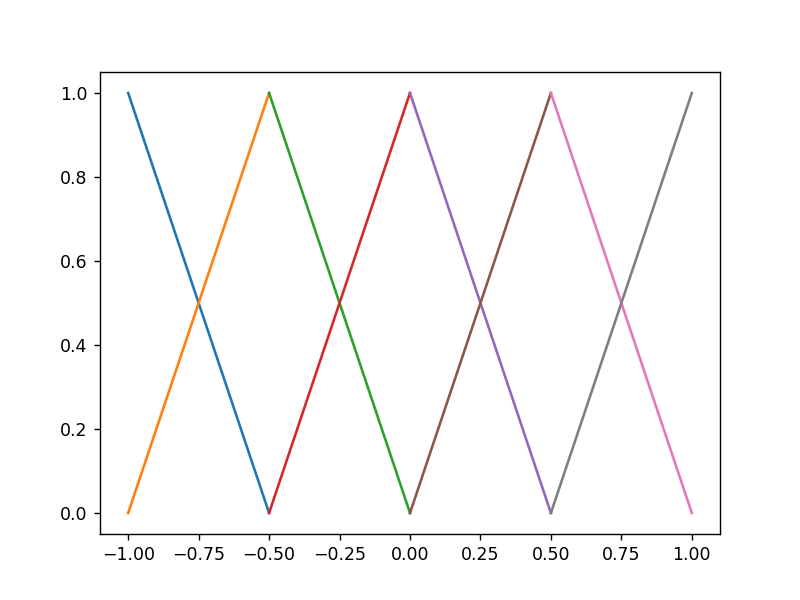

In [22]:
plt.figure()
xx = np.linspace(-1, -0.5, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k+2].subs([(x, xx[i])])
    plt.plot(xx, yy)
#
xx = np.linspace(0.0, 0.5, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k+4].subs([(x, xx[i])])
    plt.plot(xx, yy)
#
xx = np.linspace(0.5, 1.0, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k+6].subs([(x, xx[i])])
    plt.plot(xx, yy)

### Interpolating polynomial $p(x)$ to approximate $f(x)$
Now we build the complete approximating polynomial $p(x)$. Since each polynomial is now local at each sub-domain we use:

$$p(x) = {L^L}(x)f({x^L}) + {L^R}(x)f({x^R})$$

where $f({x^L})$ and $f({x^R})$ are the function values at the left and right ends of the sub-domain respectively while ${L^L}(x)$ and ${L^R}(x)$ are the associated first-order polynomials.

Within the context of the finite element method each one of the sub-domains is termed a **finite element**. As such, a finte element is then a prescribed sub-domain and its corresponding local interpolation functions. In this problem the sub-domains are comprised of two points therefore defining linear finite elements. However, elements with higher order variations can also be formulated. This local approach becomes easy to code if the local polynomials are formulated in an auxiliary reference system, as will be described later.

In the following code snippet we approximate the unknown function $f(x)$ in each sub-domain using the two locally based Lagrange polynomials. In the plot the black dots represent the exact or known nodal values of the fuction, while the continous line is the exact function.

**Questions:**

**Suggest an approach to improve the approximation to the function $f(x)$ but using the idea of locally based interpolation polynomials.**

**(Add comments to clarify the relevant steps ion the code below)**

<IPython.core.display.Javascript object>


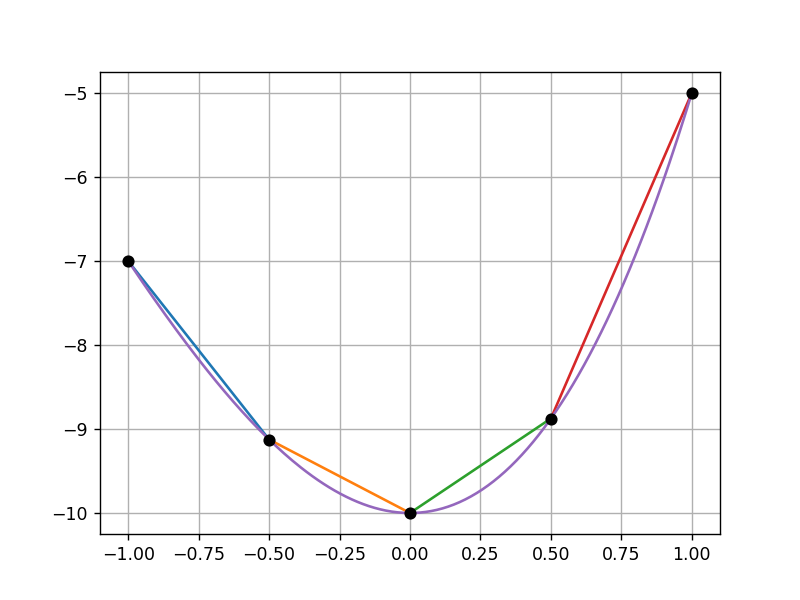

In [23]:
plt.figure()
plt.grid()
xx = np.linspace(-1.0, -0.5, npts)
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for i in range(npts):
    yy[i] = fd[1]*pol[2].subs([(x, xx[i])]) + fd[2]*pol[3].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.0, 0.5, npts)
for i in range(npts):
    yy[i] = fd[2]*pol[4].subs([(x, xx[i])]) + fd[3]*pol[5].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.5, 1.0, npts)
for i in range(npts):
    yy[i] = fd[3]*pol[6].subs([(x, xx[i])]) + fd[4]*pol[7].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(-1.0, 1.0, npts)
zz = fx(xx)
plt.plot(xx, zz)
plt.plot([-1, -0.5, 0, 0.5, 1], fd, 'ko')

### Secondary variables

The term secondary variable is given here to these functions which are obtained using the approximated function $p(x)$. For instance, assume that in the current problem we are also interested in the first order derivative of the function $f(x)$ but we don't have nodal values in order to conduct interpolation. We can however use the found approximation $p(x)$ to $f(x)$ like:


$$p'(x) = \frac{dL^L(x)}{dx}f({x^L}) + \frac{dL^R(x)}{dx}f({x^R}).$$

The following code snippet plots the known values of the first-otder derivatives (black dots), the exact derivative $f'(x)$ (blue line) and the locally computed derivatives. Note that since in each interval the function is approximated by a linear function the derivative is constant leading to jumps at the boundaries of each sub-domain.

**Questions:**

**Propose an alternative to improve the approximation to the first order derivative of the function shown below.**

**How are the discontinuities in the first derivative of the function related to the local function?**

In [24]:
dpol = []
for j in range(8):
    dpol.append(sym.diff(pol[j],x))

<IPython.core.display.Javascript object>


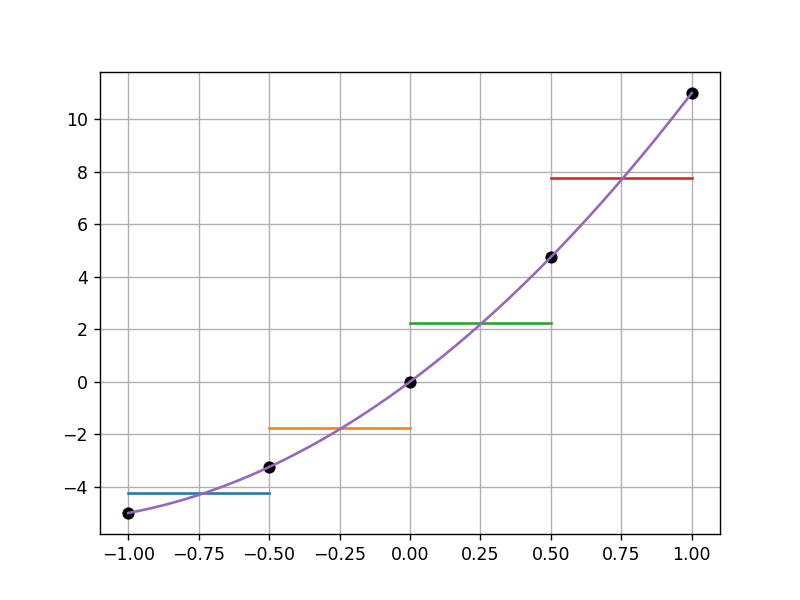

In [25]:
plt.figure()
plt.grid()
xx = np.linspace(-1.0, -0.5, npts)
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1]*dpol[1].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for i in range(npts):
    yy[i] = fd[1]*dpol[2].subs([(x, xx[i])]) + fd[2]*dpol[3].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.0, 0.5, npts)
for i in range(npts):
    yy[i] = fd[2]*dpol[4].subs([(x, xx[i])]) + fd[3]*dpol[5].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.5, 1.0, npts)
for i in range(npts):
    yy[i] = fd[3]*dpol[6].subs([(x, xx[i])]) + fd[4]*dpol[7].subs([(x, xx[i])])
plt.plot(xx, yy)
#
fc =fdx(x_data)
plt.plot([-1, -0.5, 0, 0.5, 1], fc, 'ko')

xx = np.linspace(-1.0, 1.0, npts)
for i in range(npts):
    zz[i]=fdx(xx[i])
plt.plot(xx, zz)

As a result of the local interpolation scheme the first derivative becomes discontinous. Although these disconitnuities introduce error in the solution these can be reduced using a larger number of sub-domains. In finite element analysis this corresponds to conducting a mesh refinement.

### Glossary of terms

**Node:** A point where the function to be approximated by the interpolating polynomials is known.

**Sub-domain:** A portion of the total computational domain comprised between two points but probably containing several nodes.

**Finite element:** The specification of a sub-domain size and its corresponding interpolation functions.

**Canonical element:** A finite element of constant size and thus of known interpolation polynomials and to which elements of different size can be transformed to.

### Class activity
#### Problem 1
For the function  $f(x) = {x^3} + 4{x^2} - 10$ in the range $[-1.0, 1.0]$:

* Find values at nodal points corresponding to 4 sub-domains each one with 3 nodal points and using these values implement a local interpolation scheme using 2-nd order interpolation polynomials.

* Plot the interpolation polynomial in each sub-domain and the corresponding interpolating function $p(x)$.

* In the same plot compare $p(x)$ and $f(x)$. Additionally, plot the first derivative of the function obtained from $p(x)$ and $f(x)$.

#### Problem 2
For the Runge function defined by:

$$f(x) = \frac{1}{{1 + 25{x^2}}}$$

implement an interpolation scheme using local 1st-order Lagrange polynomials using:
* (i) sub-domains of constant size $\Delta x = 0.2$
* (ii) sub-domains whose size decreases towards the edges of the interval.

#### Problem 3
Using an independent script or a notebook implement a local interpolation scheme using a canonical element of size 2.0 and use it to approximate the Runge function discussed in the class notes.

In [26]:
# This bit of code is a class added to make the title nice  (thanks to @lorenABarba )
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()